In [46]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier

# GRID SEARCHING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create Dict to Hold Dataframse

In [1]:
# ed holds the searches in case I want to refer to one later
ed = {}

# random_forest_grid keeps track of the best grid search parmeters
logistic_grid = {}

# Read Data

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(True)

# Fit Data

In [48]:
lin_mod = LogisticRegression()
lin_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
# coefficients = lin_mod.coef_[0]
# for index in np.argsort(abs(coefficients)):
#     print("{:.3f}\t{}".format(coefficients[index], cols[index]))

In [50]:
y_pred = lin_mod.predict(X_test)

In [51]:
print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))
print("Model accuracy: {}".format(lin_mod.score(X_test, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.05
Model precision: 0.5416666666666666
Model f1: 0.09154929577464789
Model accuracy: 0.8991793669402111

CONFUSION MATRIX
[[2288   11]
 [ 247   13]]

key:
 TN   FP 
 FN   TP 


# Roc Curve

0.784182085857


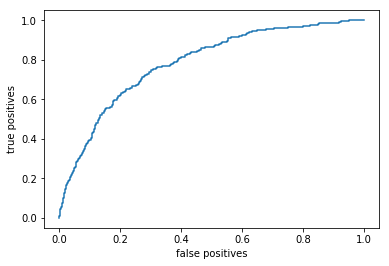

In [54]:
y_pred_proba = lin_mod.predict_proba(X_test)[:,[1]]
print(roc_auc_score(y_test, y_pred_proba))
y = roc_curve(y_test, y_pred_proba)

plt.plot(y[0], y[1])
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.show()